Loading basic libraries

In [1]:
import pandas as pd
import numpy as np


Importing data set

In [2]:
X_test = pd.read_csv('data_test.csv')
X_train = pd.read_csv('data_train.csv')


Basic data review

In [3]:
X_train.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000265060,ENSG00000265246,ENSG00000265298,ENSG00000265480,ENSG00000265929,ENSG00000266066,ENSG00000266282,ENSG00000266433,ENSG00000266753,Y
0,6.943670,2.829144,9.723770,4.495475,3.443697,3.240067,3.492317,9.251532,7.919820,5.320639,...,3.038178,3.095895,8.002209,3.190838,2.809085,3.216826,8.610210,3.297173,6.817579,0.932032
1,9.139520,2.789625,10.617848,5.330315,3.994308,2.928790,7.059437,8.109664,7.295558,5.525376,...,3.078613,3.754857,9.145682,3.369082,3.432980,3.080377,9.496544,3.033546,7.870674,0.988987
2,7.061566,2.730182,11.080711,3.852227,3.525849,3.397856,3.227136,7.929579,5.258247,5.142905,...,2.882603,2.911978,7.575089,3.593751,3.197575,2.744098,9.664830,2.939377,7.197655,0.922350
3,7.411106,3.096118,10.058010,5.142190,3.678305,3.328251,3.437501,7.195792,6.610696,5.327041,...,3.271619,3.619526,8.719681,3.691763,3.317537,2.975108,8.863168,3.442371,7.351481,0.775564
4,7.998019,2.918023,10.585413,5.513958,4.201012,3.144381,2.958268,8.826530,6.493099,5.891222,...,2.992171,3.383830,7.988477,3.143282,2.839581,3.130448,9.777649,3.164744,7.017333,0.803017


In [4]:
print("Number of variables: ", len(X_train.columns), "\nNumber of observations: ", len(X_train.index))
X_train.info()


Number of variables:  17738 
Number of observations:  644
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Columns: 17738 entries, ENSG00000000003 to Y
dtypes: float64(17738)
memory usage: 87.2 MB


We can see that all data is numerical.

Are there any missing data?

In [5]:
X_train.isnull().sum().sort_values()

ENSG00000000003    0
ENSG00000168878    0
ENSG00000168883    0
ENSG00000168884    0
ENSG00000168887    0
                  ..
ENSG00000130023    0
ENSG00000130021    0
ENSG00000130005    0
ENSG00000130037    0
Y                  0
Length: 17738, dtype: int64

No data missing. Now we are separating data set.

In [6]:
y = X_train.Y
X_train.drop(['Y'], axis=1, inplace=True)

From prevoius cells we can see that values are not standardized.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
X_train_std = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train_std, index=X_train.index, columns=X_train.columns)
X_train.head()


,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000264575,ENSG00000265060,ENSG00000265246,ENSG00000265298,ENSG00000265480,ENSG00000265929,ENSG00000266066,ENSG00000266282,ENSG00000266433,ENSG00000266753
0,0.087365,-0.084167,-0.574332,0.511206,-0.576645,-0.254682,-0.559691,1.184094,1.893237,0.179565,...,1.164085,-0.493585,-0.387521,-0.905925,-0.489034,-0.561532,0.252465,-1.428503,-0.274309,-0.950728
1,1.290324,-0.264731,1.011729,2.079898,0.783136,-0.564583,1.599256,0.478352,1.296931,0.507688,...,2.021574,-0.238897,1.443725,1.359551,0.204791,-0.033403,-0.261413,0.437162,-1.666651,0.351598
2,0.151952,-0.536323,1.832832,-0.697478,-0.373764,-0.097590,-0.720188,0.367049,-0.649141,-0.105282,...,-0.658724,-1.473497,-0.898625,-1.752145,1.079323,-0.232674,-1.527870,0.791390,-2.164006,-0.480701
3,0.343442,1.135632,0.018598,1.726405,0.002739,-0.166886,-0.592867,-0.086474,0.642740,0.189825,...,1.194622,0.976779,1.067642,0.515547,1.460839,-0.131126,-0.657866,-0.896046,0.492552,-0.290470
4,0.664972,0.321919,0.954190,2.424969,1.293608,-0.349945,-0.882916,0.921418,0.530409,1.094015,...,-0.490514,-0.783368,0.412646,-0.933132,-0.674150,-0.535717,-0.072842,1.028866,-0.973732,-0.703698


We are ready to see how ElasticNet model is performing on our data set.

In [9]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from heapq import nsmallest
import matplotlib.pylab as plt
import seaborn as sns

NOTE: from previous work on this project I noticed that ElasticNet model does not work well during the fitting strictly for Ridge/Lasso. I will use ElasticNet for "middle" values for parameters. 

In [10]:
#ElasticNet

def get_score_preliminary_en(alpha, l1_ratio):
    scores = (-1)*cross_val_score(ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=1), X_train, y, cv=5, scoring='neg_mean_squared_error')
    return scores.mean()


In [11]:
#Ridge

def get_score_preliminary_r(alpha):
    scores = (-1)*cross_val_score(Ridge(alpha=alpha, random_state=1), X_train, y, cv=5, scoring='neg_mean_squared_error')
    return scores.mean()

In [12]:
#Lasso

def get_score_preliminary_l(alpha):
    scores = (-1)*cross_val_score(Lasso(alpha=alpha, random_state=1), X_train, y, cv=5, scoring='neg_mean_squared_error')
    return scores.mean()

In [13]:
# displaying results in intuitive way

def display_hm(alphas, l1_ratio, results):
    ax = sns.heatmap(results, linewidth=0.5, xticklabels=alphas, yticklabels=l1_ratio)
    plt.show()

In [14]:
def train_save_results_arr(a):
    
    # "a" parameter is for choosing how many "alphas" we want
    alphas_preliminary = [pow(10, i-2) for i in range(0, a)]
    l1_ratio_preliminary = [i/10 for i in range(0, 11)]

    #setting array and dictionary to store our results
    results_preliminary = np.zeros((len(l1_ratio_preliminary), len(alphas_preliminary)))
    results_preliminary_dict = {}

    #traning and saving results
    for i in range(0, len(alphas_preliminary)):
        results_preliminary[0, i] = get_score_preliminary_r(alphas_preliminary[i])  # Ridge for l1_ratio = 0
        results_preliminary_dict[0, i] = results_preliminary[0, i]

    for i in range(0, len(alphas_preliminary)):
        results_preliminary[10, i] = get_score_preliminary_l(alphas_preliminary[i])  # ElasticNet for "middle" values
        results_preliminary_dict[10, i] = results_preliminary[10, i]

    for j in range(0, len(l1_ratio_preliminary)-1):
        for i in range(0, len(alphas_preliminary)):
            results_preliminary[j+1, i] = get_score_preliminary_en(alphas_preliminary[i], l1_ratio_preliminary[j+1])  # Lasso for l1_ratio = 1
            results_preliminary_dict[j+1, i] = results_preliminary[j+1, i]

    # displaying results
    display_hm(alphas_preliminary, l1_ratio_preliminary,  results_preliminary)
    
    return results_preliminary, results_preliminary_dict 


C:\Users\szyka\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.100e-03, tolerance: 9.143e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\szyka\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.768e-03, tolerance: 1.053e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\szyka\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

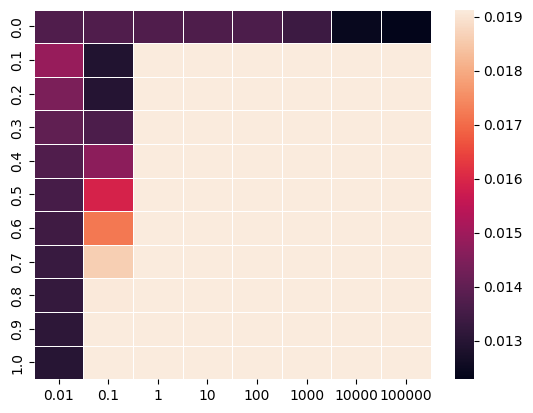

In [15]:
results_preliminary, results_preliminary_dict = train_save_results_arr(8)

In [16]:
from heapq import nsmallest

In [17]:
smallets_10 = nsmallest(10, results_preliminary_dict, key = results_preliminary_dict.get)
for i in smallets_10:
    print(i, results_preliminary_dict[i])

(0, 7) 0.012284378957439614
(0, 6) 0.012436744413080632
(1, 1) 0.012887039020805008
(2, 1) 0.012957349764968474
(10, 0) 0.013003555150478352
(9, 0) 0.013110768322990626
(8, 0) 0.013227733038055068
(7, 0) 0.013320638999769301
(0, 5) 0.01336757976073472
(6, 0) 0.013413888803807578


Saving best parameters

In [18]:
id = min(results_preliminary_dict, key=results_preliminary_dict.get)
mse_preliminary = results_preliminary_dict[id]
punishment_preliminary = pow(10, id[1]-2)

We can see that good candidate for best model is Ridge Regression. My idea is to find best "punishment" value. I am doing it by 
1. taking best punishment from preliminary training
2. setting smaller and bigger "logarithmic" neigbour, I mean:
    1. we know that in preliminary training logarithmic interval beetween alphas was "1".
    2. for finding better punishment value we create new alphas values by taking values in the middle (logarithmically) of left and right current punishmet value's intervals
3. looping this proces till the moment when mse improvement is smaller than 0.05% 

In [19]:
import math

In [20]:
def determine_punishment_value(p_min, mse_min, log_interval):
    log_val = math.log10(p_min)
    new_log_interval = log_interval*0.5
    alphas = [pow(10, log_val - new_log_interval), pow(10, log_val + new_log_interval)] #[pow(-), "p_min," pow(+)]
    results = {}
    results[p_min] = mse_min
    for i in alphas:
        results[i] = get_score_preliminary_r(i)
    
    new_p_min = min(results, key=results.get)

    if p_min == new_p_min:
        return determine_punishment_value(p_min, mse_min, new_log_interval) #preventing from falsy marking p_min as "best" only because it was chosen again (improvement = 0)
    
    else:
        new_mse_min = results[new_p_min]
        improvement = (mse_min-new_mse_min)/mse_min
        lvl = 0.005

        if(improvement >= lvl):
            return determine_punishment_value(new_p_min, new_mse_min, new_log_interval)
        
        else:
            return new_p_min, new_mse_min 

In [21]:
best_punishment, best_mse = determine_punishment_value(punishment_preliminary, mse_preliminary, 1)
print("Best punishment: ", best_punishment, "\n Best mse: ", best_mse)

Best punishment:  42169.65034285822 
 Best mse:  0.012128773720558225
